In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
#raneg of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
   #print(coordinate[0], coordinate[1])

50.66431703615356 101.1938252317467
89.23313175976006 -165.54712584815584
3.4167235217577883 -86.7453555569623
55.67777676510701 122.39052904139317
65.0543016756867 -125.5309542822104
-57.46075727122348 41.72076144808068
57.40336586036909 146.34254848820484
-78.3576186745141 -162.64159541197475
71.60036381093155 -173.55255883540264
-2.883313255361813 81.85402576160419
34.827387952572565 -163.0403089737695
-16.911380430069087 -71.55049863353861
-30.770043331697174 -3.5035925150851313
80.75509310540227 173.77543890015858
-88.48631284195869 -156.65460136760942
-86.3886919695762 -132.53945362857343
-44.96236287386281 86.34681190273187
79.25526749085307 25.241765875975716
-36.12244831801217 -23.549503697644298
71.18831861651793 99.78642597319828
74.90524869617127 19.899621950656524
-4.340279181220353 -146.44500059761455
-10.091946277420021 162.36514793047456
-44.62990963995875 43.96587013597545
71.02170799411493 -3.8629657748150805
-89.36448733920562 153.9954107009819
-85.16035454695871 126

-45.57114841554893 -74.34435823604015
-5.126157257988282 116.19475881787429
-67.42378892188931 -162.7990168797303
-63.702163668196214 52.09030570452421
44.613669725920516 -1.9508375079011842
70.27507925943465 -164.40243992865425
17.63926177909981 -136.6295419494531
21.77267307053637 61.69579426585926
27.67306887996783 99.72150345725748
34.280493337534025 142.47793457394368
12.60469095370999 82.83604548863104
-31.048205244848724 -49.834810606908064
37.279665829751394 -160.2842761259673
-11.062180013984033 -158.23777361489414
-57.63609842827987 -80.59530600469712
52.42523599326637 60.51441616698048
-9.89420619354965 87.26191025279564
10.87985509210823 -93.89074287814091
24.322499733657082 -86.9554553387067
32.257348780355215 -169.4710339166925
-66.12947384623642 3.850246572184602
-67.43482971135171 -5.51830694037227
81.33426930962426 -98.9426587734489
59.58018564935065 51.86719161959249
85.27385951490271 71.1885704692298
53.3330541549135 -32.55483235609432
74.02968845806939 -171.56946558

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kyren
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | urusha
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | okhotsk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | matara
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | cocachacra
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | havoysund
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | skjervoy
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | kirakira
Processing R

Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | vila franca do campo
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | taoudenni
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | rawson
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | buraydah
Processing Record 50 of Set 4 | la ronge
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | sao filipe
Processing Record 3 of Set 5 | yerbogachen
Processing Record 4 of Set 5 | harer
Processing Record 5 of Set 5 | hobart
Processing Record 6 of Set 5 | samana
Processing Record 7 of Set 5 | chara
Processing Record 8 of Set 5 | toliary
City not found. Skipping...
Processing Record 9 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 5 | maniitsoq
Processing Record 11 of Set 5 | provideniya
Processing Record 12 of Set 5 | gladstone
Processing Record 13 of Se

Processing Record 28 of Set 8 | colac
Processing Record 29 of Set 8 | lata
Processing Record 30 of Set 8 | devonport
Processing Record 31 of Set 8 | soron
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | koppang
Processing Record 34 of Set 8 | yefimovskiy
City not found. Skipping...
Processing Record 35 of Set 8 | vanavara
Processing Record 36 of Set 8 | pontianak
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | ilulissat
Processing Record 39 of Set 8 | san pedro
Processing Record 40 of Set 8 | yarim
Processing Record 41 of Set 8 | dongsheng
Processing Record 42 of Set 8 | preobrazheniye
Processing Record 43 of Set 8 | labuhan
Processing Record 44 of Set 8 | fort-shevchenko
Processing Record 45 of Set 8 | linfen
Processing Record 46 of Set 8 | torbay
Processing Record 47 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 8 | fort saint james
Processing Record 49 of Set 8 | yeppoon
Processing Record 50 of 

Processing Record 13 of Set 12 | naftah
City not found. Skipping...
Processing Record 14 of Set 12 | phan rang
City not found. Skipping...
Processing Record 15 of Set 12 | khromtau
Processing Record 16 of Set 12 | pozoblanco
Processing Record 17 of Set 12 | kruisfontein
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | zhigalovo
Processing Record 20 of Set 12 | alcala
Processing Record 21 of Set 12 | kjopsvik
Processing Record 22 of Set 12 | lensk
Processing Record 23 of Set 12 | gunnedah
Processing Record 24 of Set 12 | bandar-e anzali
Processing Record 25 of Set 12 | poronaysk
Processing Record 26 of Set 12 | clemson
Processing Record 27 of Set 12 | aklavik
Processing Record 28 of Set 12 | vestmannaeyjar
Processing Record 29 of Set 12 | barmer
Processing Record 30 of Set 12 | general roca
Processing Record 31 of Set 12 | monkey bay
Processing Record 32 of Set 12 | bar harbor
Processing Record 33 of Set 12 | golcuv jenikov
Processing Record 34 of Set 12 | byro

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

#reorder dataframe
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kyren,RU,2022-07-04 16:16:59,51.6828,102.1408,54.12,91,100,2.24
1,Barrow,US,2022-07-04 16:16:59,71.2906,-156.7887,37.42,93,100,10.36
2,San Cristobal,VE,2022-07-04 16:16:59,7.7669,-72.2250,71.78,99,100,6.15
3,Urusha,RU,2022-07-04 16:17:00,54.0500,122.9000,63.97,95,8,4.97
4,Norman Wells,CA,2022-07-04 16:17:00,65.2820,-126.8329,69.84,52,20,19.57
5,East London,ZA,2022-07-04 16:17:01,-33.0153,27.9116,65.19,82,95,11.74
6,Okhotsk,RU,2022-07-04 16:17:01,59.3833,143.3000,55.44,82,84,4.68
7,Mataura,NZ,2022-07-04 16:17:02,-46.1927,168.8643,44.47,76,81,6.13
8,Matara,LK,2022-07-04 16:17:02,5.9485,80.5353,79.81,83,100,11.83
9,Kapaa,US,2022-07-04 16:17:02,22.0752,-159.3190,76.98,87,75,24.16


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"


In [22]:
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1656953153.6899211

In [26]:
today = time.strftime("%x")

today

'07/04/22'

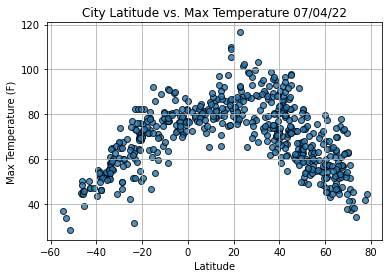

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

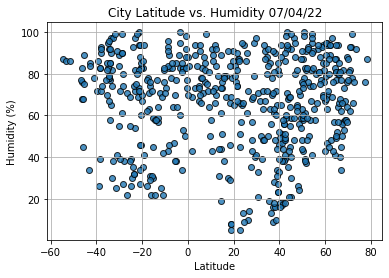

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

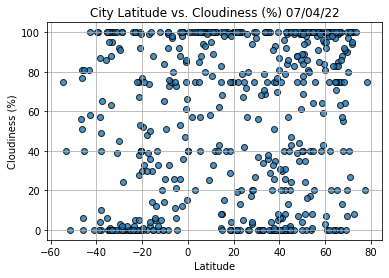

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()